__Question__
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

__Extaction of data (Web Scrapping)__

In [ ]:
#installing Beautiful soup(BS4) and Request module
!pip install bs4
!pip install requests

In [1]:
#importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import spacy
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

def getdata(url):
    r = requests.get(url, headers=HEADERS)
    return r.text

def html_code(url):
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
    return (soup)

url = "https://www.amazon.in/ASUS-VivoBook-i5-1135G7-Integrated-X415EA-EB572TS/product-reviews/B09BF65Z1V/ref=cm_cr_arp_d_viewpnt_lft?ie=UTF8&reviewerType=all_reviews&sortBy=helpful&pageNumber=1&filterByStar=positive"
soup = html_code(url)
#print(soup)

In [8]:
def cus_data(soup):
    data_str = ""
    cus_list = []
  
    for item in soup.find_all("span", class_="a-profile-name"): #span and class is decided after using inspect element on webpage
        data_str = data_str + item.get_text()
        cus_list.append(data_str)
        data_str = ""
    return cus_list
  
  
cus_res = cus_data(soup)
list = cus_res[2:]
print(list)

['Xoxoxo', 'Akshay Shukla', 'Ashutosh kumar', 'Rajender Kumar', 'kalaiselvan', 'rajiv', 'GAURAV WADHWA', 'Ashutosh Soni', 'Saifur', 'As C.']


In [9]:
def cus_rev(soup):
    data_str = ""
  
    for item in soup.find_all("span", class_="a-size-base review-text review-text-content"):
        data_str = data_str + item.get_text()
  
    result = data_str.split("\n")
    return (result)
  
  
rev_data = cus_rev(soup)
rev_result = []
for i in rev_data:
    if i == "":
        pass
    else:
        rev_result.append(i)
rev_result

["To be honest first I didn't expect this to be so good, in the starting I was worried about the product because many times we come across fraud cases but my product was genuine thank you amazon for building the trustThis laptop is especially for the college students who are into designing, ott platform, online classes, keeping records, coding etcTrust me this combination was pretty good  SSD+HTD for the long run especially for students like me*Pros*•Perfect size to carry everywhere (14inch) feels like an A4 register hehe•The keyboard feel is love, the chiklet keyboard omg 💜💜•Screen is amazing•The upper body is metallic and the lower body is of strong built plastic•Mc antivirus is free of cost•Lifetime MS Office 2019•Windows 11 free update (although I'm using it and it's pretty good)*Cons*•Speakers can be better(the sound is average you can watch a movie and the best part is the sound quality is amazing, clarity is there which makes sense for me as compared to the sound level)•Battery 

In [5]:
print(len(rev_result))

10


In [10]:
data = {'Name': list,
        'review': rev_result}
  
df = pd.DataFrame(data)

df.to_csv('amazon_reviews.csv')

In [11]:
df

,Name,review
0,Xoxoxo,To be honest first I didn't expect this to be ...
1,Akshay Shukla,Good laptop. A combination of SSD and HDD at t...
2,Ashutosh kumar,"At price of 46,126 this pc dilevers very value..."
3,Rajender Kumar,I got it at 47990rsAnd there is a little bit o...
4,kalaiselvan,It suits my requirement its compact and very c...
5,rajiv,"nice product, value for money"
6,GAURAV WADHWA,The pros are:Great priceSsd8gigs ramLight weig...
7,Ashutosh Soni,Camera not very good.. other wise very good pr...
8,Saifur,"Good laptop for the money, has some nifty n us..."
9,As C.,Nothing dislike


__Emotion mining__

In [12]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [13]:
affinity_scores=affin.set_index('word')['value'].to_dict()
#affinity_scores

In [14]:
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score


In [15]:
calculate_sentiment(text='nice')

3

In [16]:
df['sentiment_value']=df['review'].apply(calculate_sentiment)
df['sentiment_value']

0    30
1     9
2     2
3     1
4     7
5     3
6     3
7     6
8     7
9    -2
Name: sentiment_value, dtype: int64

In [17]:
df['word_count']=df['review'].str.split().apply(len)
df['word_count']

0    274
1     77
2     52
3     34
4     27
5      5
6     18
7      9
8     17
9      2
Name: word_count, dtype: int64

In [18]:
df.sort_values(by='sentiment_value')

,Name,review,sentiment_value,word_count
9,As C.,Nothing dislike,-2,2
3,Rajender Kumar,I got it at 47990rsAnd there is a little bit o...,1,34
2,Ashutosh kumar,"At price of 46,126 this pc dilevers very value...",2,52
5,rajiv,"nice product, value for money",3,5
6,GAURAV WADHWA,The pros are:Great priceSsd8gigs ramLight weig...,3,18
7,Ashutosh Soni,Camera not very good.. other wise very good pr...,6,9
4,kalaiselvan,It suits my requirement its compact and very c...,7,27
8,Saifur,"Good laptop for the money, has some nifty n us...",7,17
1,Akshay Shukla,Good laptop. A combination of SSD and HDD at t...,9,77
0,Xoxoxo,To be honest first I didn't expect this to be ...,30,274


In [19]:
df['sentiment_value'].describe()

count    10.000000
mean      6.600000
std       8.859396
min      -2.000000
25%       2.250000
50%       4.500000
75%       7.000000
max      30.000000
Name: sentiment_value, dtype: float64

__Negative and neutral reviews__

In [20]:
df[df['sentiment_value']<=0]

,Name,review,sentiment_value,word_count
9,As C.,Nothing dislike,-2,2


__Positive reviews__

In [21]:
df[df['sentiment_value']>0]

,Name,review,sentiment_value,word_count
0,Xoxoxo,To be honest first I didn't expect this to be ...,30,274
1,Akshay Shukla,Good laptop. A combination of SSD and HDD at t...,9,77
2,Ashutosh kumar,"At price of 46,126 this pc dilevers very value...",2,52
3,Rajender Kumar,I got it at 47990rsAnd there is a little bit o...,1,34
4,kalaiselvan,It suits my requirement its compact and very c...,7,27
5,rajiv,"nice product, value for money",3,5
6,GAURAV WADHWA,The pros are:Great priceSsd8gigs ramLight weig...,3,18
7,Ashutosh Soni,Camera not very good.. other wise very good pr...,6,9
8,Saifur,"Good laptop for the money, has some nifty n us...",7,17


In [23]:
df['index']=range(0,len(df))
df

,Name,review,sentiment_value,word_count,index
0,Xoxoxo,To be honest first I didn't expect this to be ...,30,274,0
1,Akshay Shukla,Good laptop. A combination of SSD and HDD at t...,9,77,1
2,Ashutosh kumar,"At price of 46,126 this pc dilevers very value...",2,52,2
3,Rajender Kumar,I got it at 47990rsAnd there is a little bit o...,1,34,3
4,kalaiselvan,It suits my requirement its compact and very c...,7,27,4
5,rajiv,"nice product, value for money",3,5,5
6,GAURAV WADHWA,The pros are:Great priceSsd8gigs ramLight weig...,3,18,6
7,Ashutosh Soni,Camera not very good.. other wise very good pr...,6,9,7
8,Saifur,"Good laptop for the money, has some nifty n us...",7,17,8
9,As C.,Nothing dislike,-2,2,9


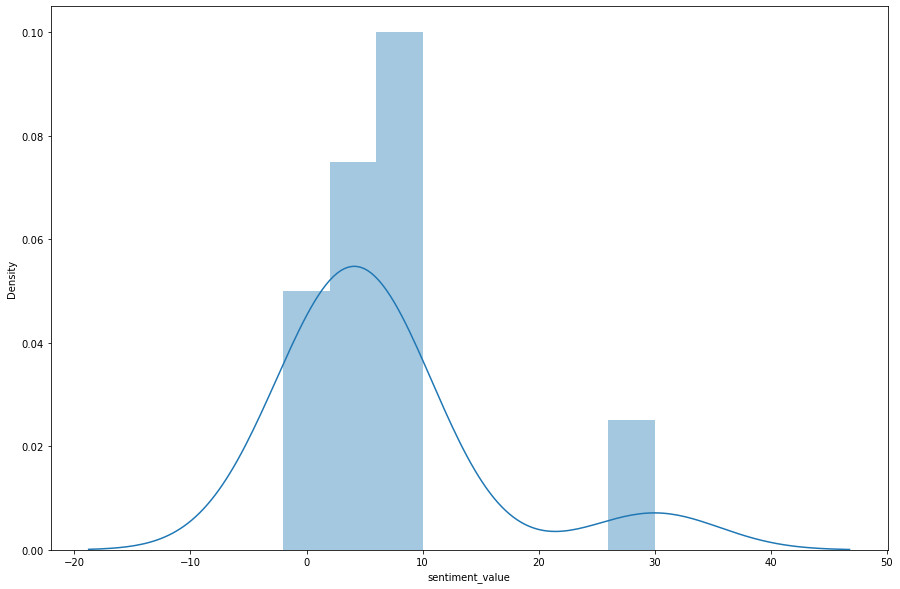

In [24]:
#Density plot
plt.figure(figsize=(15,10))
sns.distplot(df['sentiment_value']);

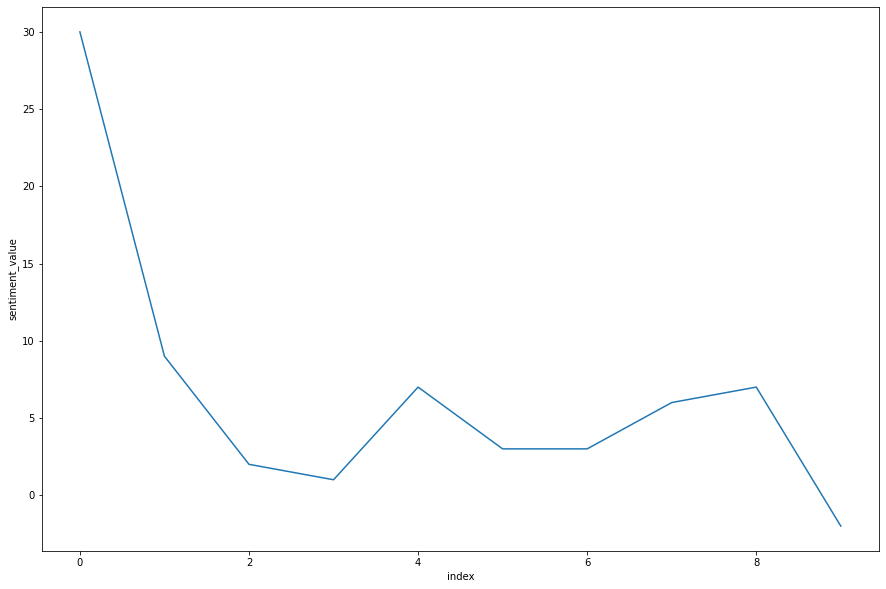

In [25]:
#line plot
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=df);